In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

Populating the interactive namespace from numpy and matplotlib


In [26]:
data = np.load('data.npy')
samples = np.load('samples.npy')
split=180 #there are 200 samples, this was the training split

In [31]:
#triangle plot - adapted from Byeonghee Yu and Nick Kern's Fisher ellipse function (used in PHY 151 2018)
def triangle_scatter(data,names,saveName=None,scatter=None,nsig=None):
    nData,nParams=data.shape
    
    #setting up plot
    fig, axes = plt.subplots(nParams,nParams,figsize=(20,20))
    fig.subplots_adjust(wspace=0, hspace=0)
    color=False
    #looping over parameters
    for i in range(nParams):
        for j in range(nParams):
            ax = axes[i, j]
            if j > i:
                ax.axis('off')
                continue
            elif i == j:
                # diagonal part - 1d histograms
                #ax.grid(True)
                yarr,bins = np.histogram(data[:,i],density=True,bins=15)
                xarr = (bins[1:]+bins[:-1])/2
                if(color):
                    ax.plot(xarr,yarr)
                else:
                    ax.plot(xarr,yarr,'C1')
                ax.set_xlim(data[:,j].min(),data[:,j].max())
                if(nsig is not None): #if you want, cut the plots at a certain number of sigma
                    rng = 2*nsig*np.std(data[:,j])
                    start=np.mean(data[:,j])-nsig*np.std(data[:,j],axis=0)
                    fin=np.mean(data[:,j])+nsig*np.std(data[:,j],axis=0)
                    ax.set_xlim(start,fin)
                else:
                    rng = data[:,i].max()-data[:,i].min()
                    start=data[:,j].min()
                    fin=data[:,j].max()
                ax.set_xticks([start+rng/4,start+rng/2,fin-rng/4])
                ax.set_xticklabels(['{0:.2g}'.format(start+rng/4),'{0:.2g}'.format(start+rng/2),'{0:.2f}'.format(fin-rng/4)])
                ax.set_yticks([])

            else:
                #density plot of samples
                ax.hexbin(data[:,j],data[:,i], bins='log',zorder=-1)
                
                #training data
                if(scatter is not None):
                    ax.plot(scatter[:split,j],scatter[:split,i],marker='.',ms=4.75,ls=' ',c='k')

                #for the ticks etc.
                if(nsig is not None): #if you want, cut the plots at a certain number of sigma
                    rngi,rngj = 2*nsig*np.std(data[:,i]),2*nsig*np.std(data[:,j])
                    starti,startj=np.mean(data[:,i])-nsig*np.std(data[:,i]),np.mean(data[:,j])-nsig*np.std(data[:,j])
                    fini,finj=np.mean(data[:,i])+nsig*np.std(data[:,i]),np.mean(data[:,j])+nsig*np.std(data[:,j])              
                    ax.set_ylim(starti,fini)
                    ax.set_xlim(startj,finj)
                else:

                    starti,fini = data[:,i].min(),data[:,i].max()
                    startj,finj=data[:,j].min(),data[:,j].max()
                    rngi,rngj = fini-starti,finj-startj
                    ax.set_xlim(startj,finj)
                    ax.set_ylim(starti,fini)

                    
                ax.set_yticks([starti+rngi/4,starti+rngi/2,fini-rngi/4])
                ax.set_xticks([startj+rngj/4,startj+rngj/2,finj-rngj/4])
                ax.set_xticklabels(['{0:.2g}'.format(startj+rngj/4),'{0:.2g}'.format(startj+rngj/2),'{0:.2g}'.format(finj-rngj/4)])
                ax.set_yticklabels(['{0:.2g}'.format(starti+rngi/4),'{0:.2g}'.format(starti+rngi/2),'{0:.2g}'.format(fini-rngi/4)])


            if j != 0:
                ax.set_yticklabels([])
            if i != nParams-1:
                ax.set_xticklabels([])
            if j == 0:# and i !=0:
                ax.set_ylabel(names[i], fontsize=28)
                [tl.set_rotation(36) for tl in ax.get_yticklabels()]
            if i == nParams-1:
                ax.set_xlabel(names[j], fontsize=28)
                [tl.set_rotation(36) for tl in ax.get_xticklabels()]

    if(saveName is not None): plt.savefig(saveName)
        
    return 0

In [32]:
samples.shape

(50000, 6)

0

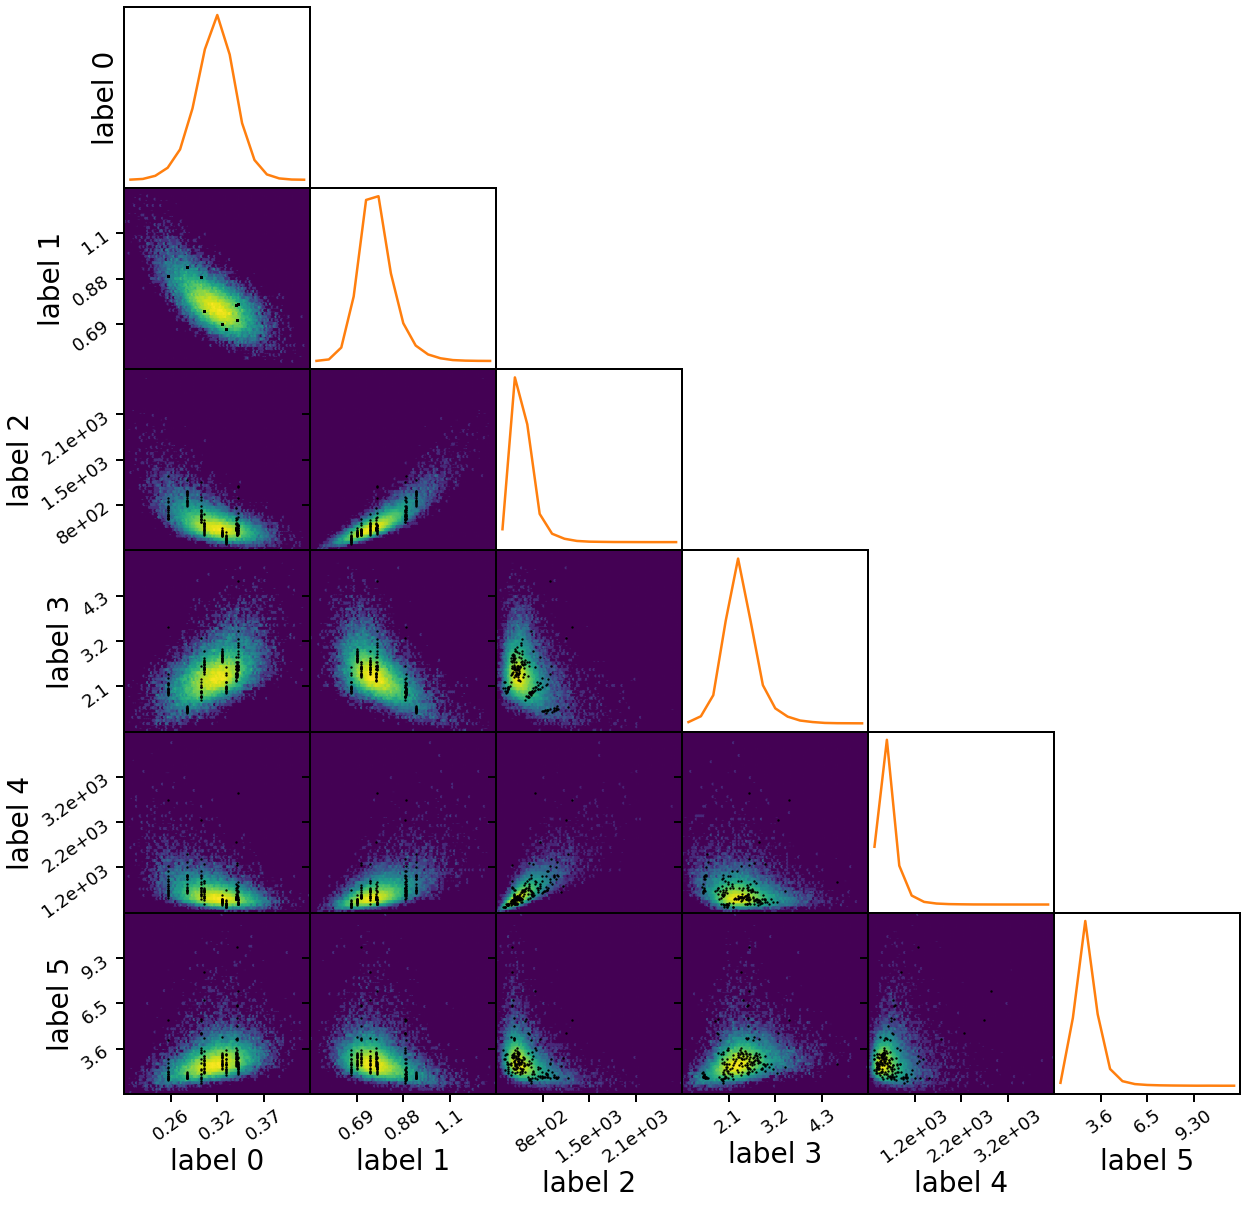

In [33]:
names = np.array(['label {0}'.format(i) for i in range(samples.shape[-1])])
triangle_scatter(samples,names,
                 saveName='density_plot.png',
                 scatter=data
                )
                 